# Choosing Activation Function

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from IPython.display import display, Image


import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Sequential

## Random DataSet

In [60]:
data = load_digits(n_class=2)

In [62]:
X_train, Y_train = data["data"], data["target"]

In [64]:
X_train[0], Y_train[:10]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1]))

In [65]:
X_train.shape, Y_train.shape

((360, 64), (360,))

## Normalize the dataset

In [66]:
def normalize(data):
    return (data-np.mean(data))/np.std(data)

In [67]:
X_norm = normalize(X_train)

In [68]:
X_norm.shape

(360, 64)

## Choosing Activation Function for Output Layer

<pre>
To choose activation function for output layer is depend upone our Y_train data set. 
i.e, it depend on how many classes Y_train have, for example - 
    -> if we have <b>2 classes (1 and 0)</b> the we can use <b>sigmoid activation</b> function, 
    
    -> but if we have <b>linear classes (any number -0.9, 746.9, -27.4, ...)</b> then we can use <b>linear activation</b> or
    
    -> if we have <b>infinite number</b> of classes such as linear classes but we having only <b>positive numbers (number>=0)</b> then we can use <b>RelU activation</b> function and
    
    -> if we have <b>multiple finite classes (0 - 9 classes)</b> then we can use <b>softmax activation</b> function. 
</pre>

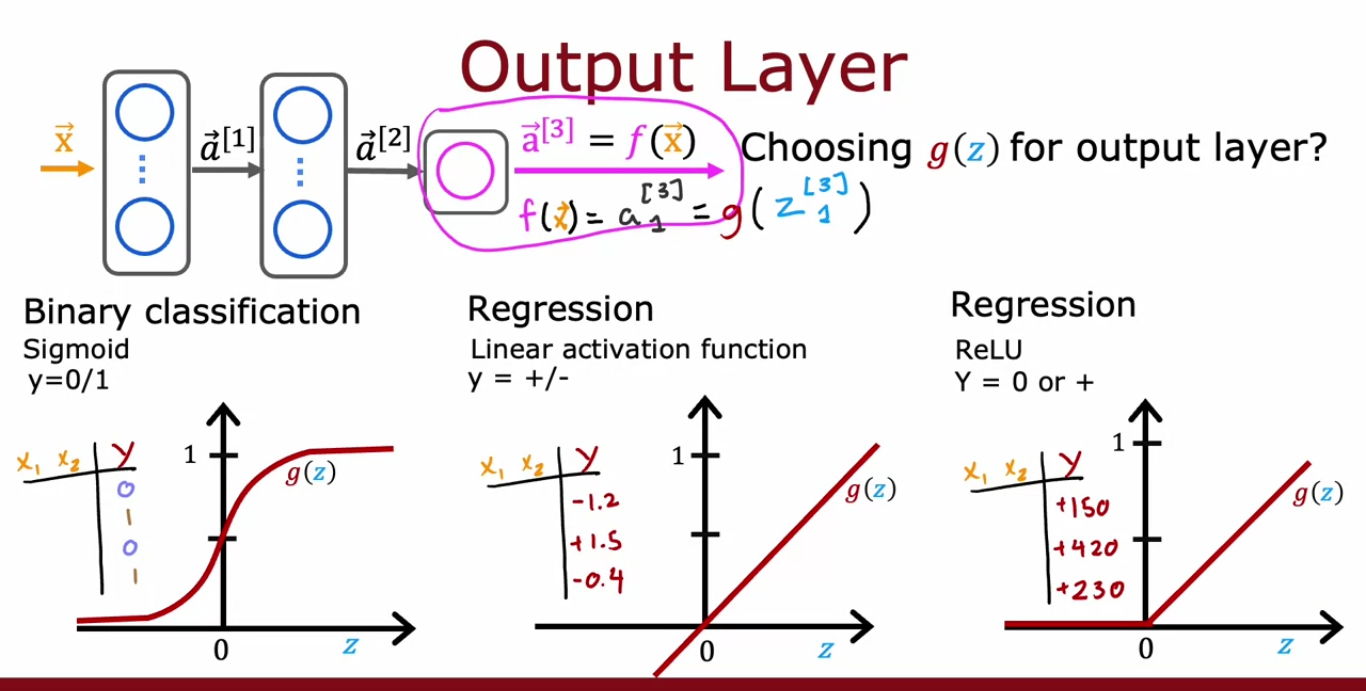

In [2]:
# Specify the path to your image file
image_path = "./notes/chossing right activation function for output layer.png"

# Display the image
display(Image(filename=image_path))

So according to current problem we are going to use <b>Sigmoid Activation</b> function As we have only 2 classes (0 and 1)

## Choosing Activation Function for Hidden Layers

To choose activation function for Hidden layer, we can try different - different function and then choose the most optimize  function. But most of the peoples suggest to use <b>reLU activation</b> as a hidden layer because it gives more accurate result.

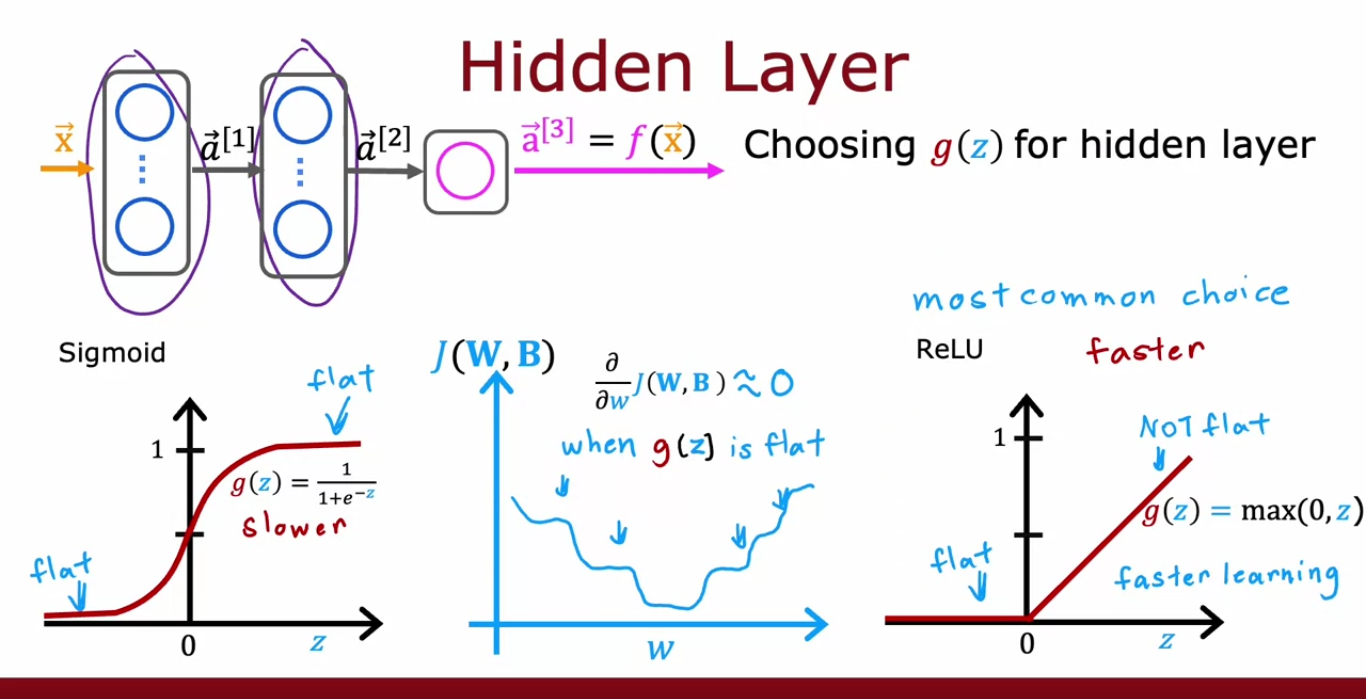

In [1]:
# Specify the path to your image file
image_path = "./notes/chossing right activation function for hidden layers.png"

# Display the image
display(Image(filename=image_path))

In [82]:
model = Sequential([
    Input(64),
    Dense(25, activation='relu', name="HiddenLayer1"),  # ReLU for hidden layer
    Dense(15, activation='relu', name="HiddenLayer2"),
    Dense(1, activation='sigmoid', name="OuputLayer")   # Sigmoid for output layer
])

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 25)                1625      
                                                                 
 HiddenLayer2 (Dense)        (None, 15)                390       
                                                                 
 OuputLayer (Dense)          (None, 1)                 16        
                                                                 
Total params: 2031 (7.93 KB)
Trainable params: 2031 (7.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [85]:
model.fit(X_norm, Y_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 2s 4ms/step - loss: 0.5231 - accuracy: 0.7472
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.2904 - accuracy: 0.9667
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9972
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0702 - accuracy: 0.9944
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0413 - accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0279 - accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 1.0000


## Prediction

In [86]:
prediction = model.predict(X_train)

12/12 [==============================] - 0s 2ms/step


In [91]:
for i in prediction[:10]:
    if(i > 0.5):
        print(1, end=" ")
    else:
        print(0, end=" ")

0 1 0 1 0 1 0 0 1 1 

In [92]:
Y_train[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1])